In [1]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)
from IPython.display import display

In [2]:
import os
from pathlib import Path
dirpath = './uHoo/'
paths = sorted(Path(dirpath).glob("*.xlsx"), key=os.path.basename)
raw_udf = pd.concat([pd.read_excel(f, header=None) for f in paths])
raw_udf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date/time,Instance,Sensor,Value,Units,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure
1,"February 15, 2020 at 04:19PM",Walnut,Air Pressure,1010.97,mbar,21.4,33.9,7.9,807,0,53,21.9,7.9,1011
2,"February 15, 2020 at 04:20PM",Walnut,Air Pressure,1011,mbar,21.4,33.9,7.9,808,0,55,22.1,7.9,1011
3,"February 15, 2020 at 04:23PM",Walnut,Air Pressure,1011.07,mbar,21.4,33.8,7.3,808,0,55,21.1,7.8,1011.1
4,"February 15, 2020 at 04:24PM",Walnut,Air Pressure,1011.1,mbar,21.4,33.9,7.6,812,0,55,22.4,7.9,1011.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,"March 1, 2022 at 05:08AM",Walnut,Air Pressure,1009.21,mbar,17.9,33.1,5,457,0,20,53.1,9.7,1009.2
1600,"March 1, 2022 at 05:09AM",Walnut,Air Pressure,1009.15,mbar,17.9,32.3,5,461,0,20,52.3,9.6,1009.1
1601,"March 1, 2022 at 06:06AM",Walnut,Air Pressure,1008.82,mbar,17.9,30.5,8,463,0,41,58.5,9.8,1008.8
1602,"March 1, 2022 at 06:07AM",Walnut,Air Pressure,1008.85,mbar,17.8,31.5,5,462,0,41,55.6,9.7,1008.9


In [3]:
udf = raw_udf.copy()

# turn first row into column labels
udf.columns = udf.iloc[0]

# Drop the column data row
udf = udf.iloc[1:]

# Drop useless columns
udf = udf.drop(['Instance', 'Sensor', 'Value', 'Units'], axis=1)

# Convert first column to date type
udf['Date/time'] = pd.to_datetime(udf['Date/time'], format="%B %d, %Y at %I:%M%p")

# Convert everything else to numeric
interior_cols = ['Temperature','Humidity','PM2.5','CO2','CO','TVOC','NO2','Ozone','Pressure']
udf[interior_cols] = udf[interior_cols].apply(pd.to_numeric)

# Renumber from zero
udf = udf.reset_index(drop=True)

# Set date/time index
udf = udf.set_index('Date/time')
udf['datetime'] = udf.index

udf.head()

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,datetime
Date/time,,,,,,,,,,
2020-02-15 16:19:00,21.4,33.9,7.9,807,0.0,53,21.9,7.9,1011.0,2020-02-15 16:19:00
2020-02-15 16:20:00,21.4,33.9,7.9,808,0.0,55,22.1,7.9,1011.0,2020-02-15 16:20:00
2020-02-15 16:23:00,21.4,33.8,7.3,808,0.0,55,21.1,7.8,1011.1,2020-02-15 16:23:00
2020-02-15 16:24:00,21.4,33.9,7.6,812,0.0,55,22.4,7.9,1011.1,2020-02-15 16:24:00
2020-02-15 16:25:00,21.4,33.9,7.4,813,0.0,54,21.5,7.9,1011.1,2020-02-15 16:25:00


In [4]:
udf.describe()

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure
count,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000
mean,21.636465,41.753378,2.310634,754.625368,0.014210,151.947419,17.925527,7.790251,1000.667227
std,1.762421,10.921825,2.813047,201.405182,0.178755,229.485451,21.146656,0.997603,7.259274
min,12.500000,10.700000,1.000000,400.000000,0.000000,0.000000,0.000000,3.600000,971.800000
25%,21.400000,31.800000,1.000000,569.000000,0.000000,24.000000,0.800000,7.100000,996.000000
50%,22.100000,42.100000,1.000000,775.000000,0.000000,70.000000,10.200000,7.600000,1000.200000
75%,22.700000,51.300000,3.000000,900.000000,0.000000,171.000000,27.900000,8.100000,1005.400000
max,27.400000,82.000000,123.200000,2050.000000,7.900000,1200.000000,181.400000,13.600000,1025.200000


<AxesSubplot: xlabel='Date/time'>

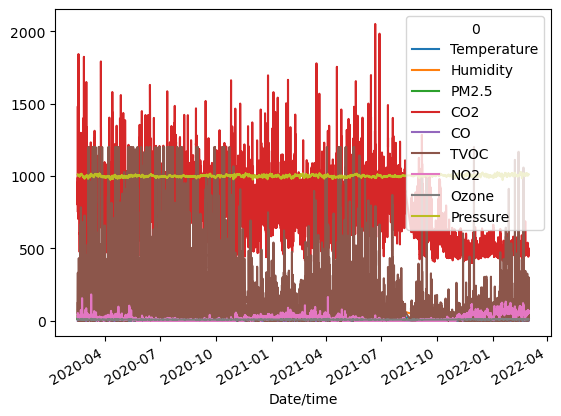

In [5]:
udf[interior_cols].plot.line()
#udf[interior_cols].plot.scatter(x='Pressure', y='Date/time')

<AxesSubplot: xlabel='Date/time'>

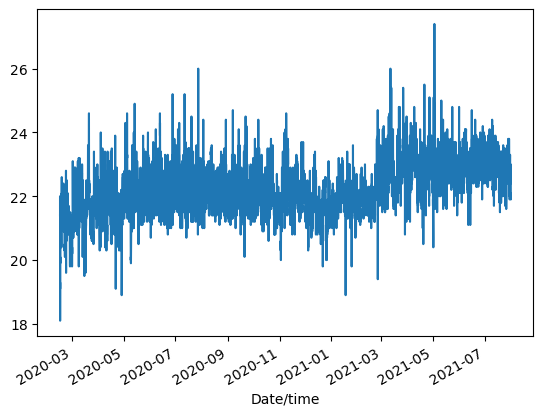

In [6]:
testdf = udf[(udf.datetime <= '2021-08-01')].copy()
#testdf = udf[(udf.datetime >= '2021-09-01')].copy()
testdf['Temperature'].plot.line()


<AxesSubplot: xlabel='Date/time'>

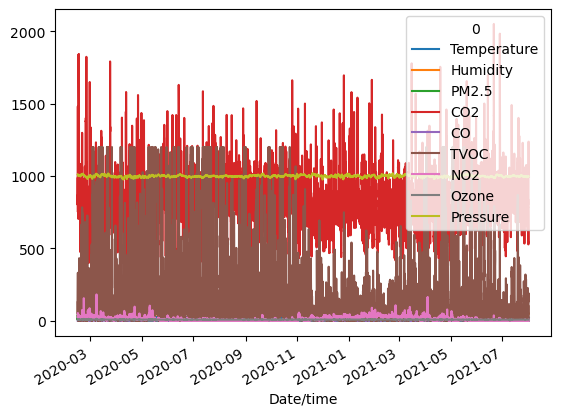

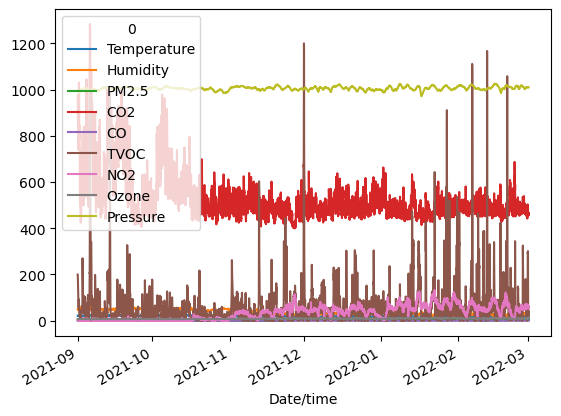

In [7]:
# separate 3 sensor locations 
#df1 = udf.loc[:, (udf['datetime'] >= '2021-04-01') & (udf['datetime'] < '2021-08-01')]
#df2 = udf.loc[:, (udf['datetime'] >= '2021-09-01') & (udf['datetime'] < '2021-11-23')]
#df3 = udf.loc[:, (udf['datetime'] >= '2021-11-24')]

#cond1 = (udf.datetime>='2021-04-01') & (udf.datetime < '2021-08-01')
#df1 = udf[(udf.datetime>='2021-04-01') & (udf.datetime < '2021-08-01')].copy()
#df2 = udf[(udf['datetime'] >= '2021-09-01') & (udf['datetime'] < '2021-11-23')].copy()
#df3 = udf[(udf['datetime'] >= '2021-11-24')].copy()

df1 = udf[(udf.datetime <= '2021-08-01')].copy()
df2 = udf[(udf.datetime >= '2021-09-01')].copy()

#idx1 = np.where( cond1)[0]

#df1 = udf[idx1].copy()
#df1.describe()
#splits = (list(train_idx), list(valid_idx))

df1[interior_cols].plot.line()
df2[interior_cols].plot.line()
#df3[interior_cols].plot.line()

In [8]:
df1.describe()

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure
count,38236.000000,38236.000000,38236.000000,38236.000000,38236.000000,38236.000000,38236.000000,38236.000000,38236.000000
mean,22.243731,42.525636,2.013822,831.226697,0.019568,187.318600,13.049592,7.545434,999.093399
std,0.764746,11.325930,2.967093,167.817929,0.209567,254.906037,13.787395,0.520433,6.600655
min,18.100000,10.700000,1.000000,400.000000,0.000000,0.000000,0.000000,3.900000,975.100000
25%,21.700000,32.200000,1.000000,732.000000,0.000000,35.000000,0.800000,7.200000,994.800000
50%,22.200000,43.300000,1.000000,835.000000,0.000000,92.500000,8.200000,7.500000,998.900000
75%,22.800000,52.500000,1.000000,934.000000,0.000000,222.000000,23.400000,7.900000,1003.600000
max,27.400000,82.000000,123.200000,2050.000000,7.900000,1200.000000,181.400000,13.600000,1018.000000


In [9]:
from fastai.tabular.core import add_datepart
#add_datepart(df1, 'datetime', drop=False)
df1.reset_index(drop=True, inplace=True)
df1

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,datetime
0,21.4,33.9,7.9,807,0.0,53,21.9,7.9,1011.0,2020-02-15 16:19:00
1,21.4,33.9,7.9,808,0.0,55,22.1,7.9,1011.0,2020-02-15 16:20:00
2,21.4,33.8,7.3,808,0.0,55,21.1,7.8,1011.1,2020-02-15 16:23:00
3,21.4,33.9,7.6,812,0.0,55,22.4,7.9,1011.1,2020-02-15 16:24:00
4,21.4,33.9,7.4,813,0.0,54,21.5,7.9,1011.1,2020-02-15 16:25:00
...,...,...,...,...,...,...,...,...,...,...
38231,22.2,50.2,1.0,1068,0.0,158,0.0,7.2,995.8,2021-07-31 22:08:00
38232,22.2,50.2,1.0,1071,0.0,158,0.4,7.2,995.8,2021-07-31 22:09:00
38233,22.3,47.5,1.0,997,0.0,147,0.6,7.2,995.7,2021-07-31 23:06:00
38234,22.3,50.7,1.0,998,0.0,142,0.6,7.2,995.7,2021-07-31 23:07:00


In [10]:
weatherDataFile = "WU_20200201-20210801.txt"
wdf = pd.read_csv('uHoo/'+weatherDataFile, delimiter='\t')
exterior_cols = [c for c in wdf.columns if c!='Date']

# Convert first column to date type
wdf['Date'] = pd.to_datetime(wdf['Date'], format="%m/%d/%y")

# Set date/time index
wdf = wdf.set_index('Date')
wdf['date'] = wdf.index

wdf.head()

,TempF_Max,TempF_Avg,TempF_Min,DewPointF_Max,DewPointF_Avg,DewPointF_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeedMPH_Max,WindSpeedMPH_Avg,WindSpeedMPH_Min,PressureIN_Max,PressureIN_Avg,PressureIN_Min,PrecipitationIN_Total,date
Date,,,,,,,,,,,,,,,,,
2020-02-01,49,37.8,26,38,32.5,23,93,82.2,59,13,3.2,0,29.8,29.6,29.4,0.00,2020-02-01
2020-02-02,58,41.9,30,35,30.6,28,100,68.2,37,18,6.8,0,29.4,29.3,29.1,0.10,2020-02-02
2020-02-03,67,57.6,43,37,34.4,31,62,42.5,29,20,9.3,3,29.6,29.5,29.3,0.00,2020-02-03
2020-02-04,66,59.3,54,49,43.6,37,75,56.6,47,10,5.0,0,29.5,29.5,29.4,0.00,2020-02-04
2020-02-05,58,41.8,37,49,35.8,30,96,79.7,68,21,9.3,0,29.8,29.6,29.4,0.01,2020-02-05


In [11]:
# add date (without time) column for join
df1['date'] = pd.to_datetime(df1['datetime'].dt.date)

# Create merged data set
mdf = df1.merge(wdf, on=["date"], how="left")

# Add derivatives
#for col in interior_cols:
#    mdf["%s_diff"%col] = mdf[col].diff(periods=2)

#for col in exterior_cols:
#    mdf["%s_diff"%col] = mdf[col].diff(periods=24)

# Add rain prediction column
#mdf['Rain'] = np.where(mdf['PrecipitationIN_Total']>0.0, True, False)

# Show
#mdf.info()
mdf

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,datetime,...,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeedMPH_Max,WindSpeedMPH_Avg,WindSpeedMPH_Min,PressureIN_Max,PressureIN_Avg,PressureIN_Min,PrecipitationIN_Total
0,21.4,33.9,7.9,807,0.0,53,21.9,7.9,1011.0,2020-02-15 16:19:00,...,77,55.2,39,12,5.5,0,30.3,30.2,30.0,0.0
1,21.4,33.9,7.9,808,0.0,55,22.1,7.9,1011.0,2020-02-15 16:20:00,...,77,55.2,39,12,5.5,0,30.3,30.2,30.0,0.0
2,21.4,33.8,7.3,808,0.0,55,21.1,7.8,1011.1,2020-02-15 16:23:00,...,77,55.2,39,12,5.5,0,30.3,30.2,30.0,0.0
3,21.4,33.9,7.6,812,0.0,55,22.4,7.9,1011.1,2020-02-15 16:24:00,...,77,55.2,39,12,5.5,0,30.3,30.2,30.0,0.0
4,21.4,33.9,7.4,813,0.0,54,21.5,7.9,1011.1,2020-02-15 16:25:00,...,77,55.2,39,12,5.5,0,30.3,30.2,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38231,22.2,50.2,1.0,1068,0.0,158,0.0,7.2,995.8,2021-07-31 22:08:00,...,68,55.9,42,8,5.5,0,29.7,29.6,29.6,0.0
38232,22.2,50.2,1.0,1071,0.0,158,0.4,7.2,995.8,2021-07-31 22:09:00,...,68,55.9,42,8,5.5,0,29.7,29.6,29.6,0.0
38233,22.3,47.5,1.0,997,0.0,147,0.6,7.2,995.7,2021-07-31 23:06:00,...,68,55.9,42,8,5.5,0,29.7,29.6,29.6,0.0
38234,22.3,50.7,1.0,998,0.0,142,0.6,7.2,995.7,2021-07-31 23:07:00,...,68,55.9,42,8,5.5,0,29.7,29.6,29.6,0.0


In [12]:
from fastbook import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from dtreeviz.trees import *

/Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/torchvision/image.so, 6): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: /Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/torchvision/image.so
  Expected in: /Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib
 in /Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/torchvision/image.so
  warn(f"Failed to load image Python extension: {e}")


In [15]:
from fastai.tabular.all import *
    
train_idx = np.where((mdf.date<'2021-02-01'))[0]
valid_idx = np.where((mdf.date>='2021-02-01') & (mdf.date<'2021-05-01'))[0]
test_idx = np.where((mdf.date>='2021-05-01'))[0]
splits = (list(train_idx), list(valid_idx))

def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

len(train_idx), len(valid_idx), len(test_idx)

(25381, 6325, 6530)

Predicting PrecipitationIN_Total
Decision Tree
Train RMSE: 0.2595
Valid RMSE: 0.3241


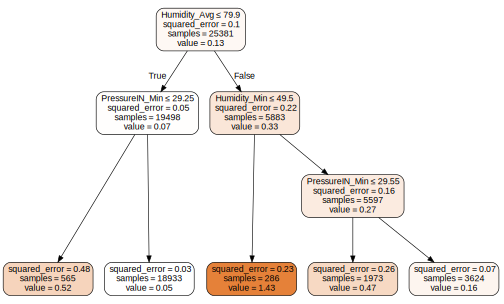

/Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


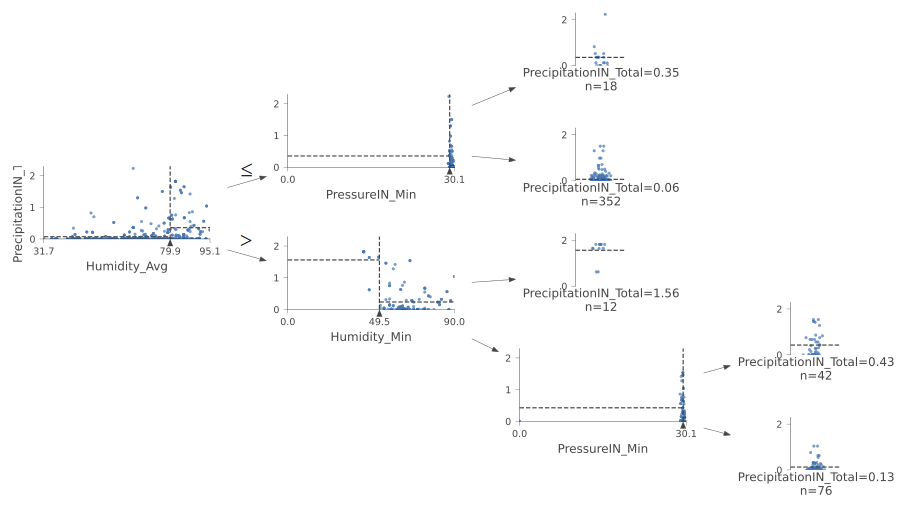

In [18]:
dep_var = 'PrecipitationIN_Total'

# Create final training data frame
tdf = mdf.copy()
# Drop useless columns
tdf = tdf.drop(['datetime','date'], axis=1)
# Fix for https://forums.fast.ai/t/tabular-learner-error-found-dtype-char-but-expected-float/77245/12
tdf = tdf.astype({dep_var: np.float16}) 

cont,cat = cont_cat_split(tdf, 1, dep_var=dep_var)
to = TabularPandas(tdf, [Categorify, FillMissing], cat, cont, y_names=dep_var, splits=splits)

xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
m = DecisionTreeRegressor(max_leaf_nodes=5)
m.fit(xs, y)

print("Predicting %s" % (dep_var))
print("Decision Tree")
print("Train RMSE: %2.4f" % m_rmse(m, xs, y))
print("Valid RMSE: %2.4f" % m_rmse(m, valid_xs, valid_y))
#print("Test RMSE: %2.4f" % m_rmse(m, valid_xs, valid_y))

g1 = draw_tree(m, xs, size=7, leaves_parallel=True, precision=2);
display(g1)

samp_idx = np.random.permutation(len(y))[:500]
g2 = dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var, fontname='DejaVu Sans', scale=1.6, label_fontsize=10, orientation='LR');
display(g2)

<AxesSubplot: xlabel='Humidity_Avg', ylabel='PrecipitationIN_Total'>

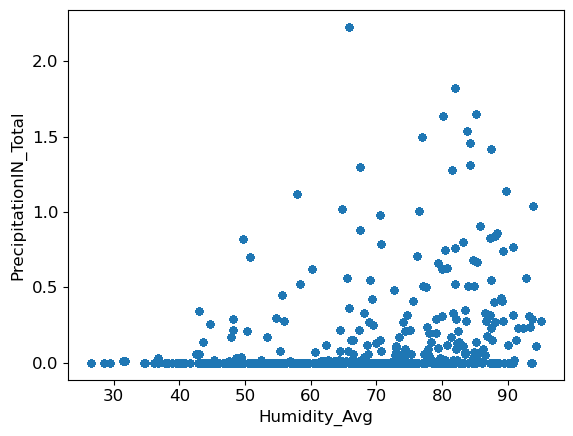

In [19]:
#mdf.plot.scatter(x='Pressure', y='PressureIN_Max')
#mdf.plot.scatter(x='TempF_Max', y=['Temperature'])
#mdf.plot.scatter(x='Ozone', y=['NO2'])
mdf.plot.scatter(x='Humidity_Avg', y='PrecipitationIN_Total')

In [20]:
def rf(xs, y, n_estimators=40, max_samples=100_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

m = rf(xs, y, n_estimators=7, max_samples=200);

print("Random Forest")
print("Train RMSE: %2.4f" % m_rmse(m, xs, y))
print("Valid RMSE: %2.4f" % m_rmse(m, valid_xs, valid_y))
print("Valid OOB: %2.4f" % r_mse(m.oob_prediction_, y))

Random Forest
Train RMSE: 0.2666
Valid RMSE: 0.1860
Valid OOB: 0.2674


In [21]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
vdf = to.valid.copy()
vdf['pred_mean'] = pd.Series(preds.mean())
vdf['pred_std'] = pd.Series(preds.std(0))
pd.DataFrame(data=vdf.xs, columns=vdf.x_names+['pred_mean','pred_std'])


/Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,TempF_Max,TempF_Avg,TempF_Min,DewPointF_Max,DewPointF_Avg,DewPointF_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeedMPH_Max,WindSpeedMPH_Avg,WindSpeedMPH_Min,PressureIN_Max,PressureIN_Avg,PressureIN_Min,pred_mean,pred_std
25381,21.500000,27.600000,1.0,791,0.0,122,36.299999,8.3,993.099976,33,29.700001,26,29,26.600000,22,92,88.000000,84,17,13.800000,9,29.5,29.4,29.299999,NaN,NaN
25382,21.600000,27.500000,1.0,787,0.0,122,36.799999,8.4,993.000000,33,29.700001,26,29,26.600000,22,92,88.000000,84,17,13.800000,9,29.5,29.4,29.299999,NaN,NaN
25383,21.600000,27.400000,1.0,788,0.0,119,36.500000,8.3,992.900024,33,29.700001,26,29,26.600000,22,92,88.000000,84,17,13.800000,9,29.5,29.4,29.299999,NaN,NaN
25384,21.500000,27.400000,1.0,758,0.0,52,37.200001,8.4,992.099976,33,29.700001,26,29,26.600000,22,92,88.000000,84,17,13.800000,9,29.5,29.4,29.299999,NaN,NaN
25385,21.500000,27.400000,1.0,751,0.0,52,37.000000,8.4,992.200012,33,29.700001,26,29,26.600000,22,92,88.000000,84,17,13.800000,9,29.5,29.4,29.299999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,21.799999,32.400002,2.0,514,0.0,229,19.700001,7.7,994.000000,71,61.400002,51,59,40.900002,25,76,49.400002,26,33,23.200001,14,29.6,29.4,29.299999,NaN,NaN
31702,21.799999,32.500000,1.0,515,0.0,229,20.799999,7.8,993.900024,71,61.400002,51,59,40.900002,25,76,49.400002,26,33,23.200001,14,29.6,29.4,29.299999,NaN,NaN
31703,21.700001,33.000000,1.0,535,0.0,235,18.500000,7.7,995.299988,71,61.400002,51,59,40.900002,25,76,49.400002,26,33,23.200001,14,29.6,29.4,29.299999,NaN,NaN
31704,21.700001,32.900002,1.0,537,0.0,249,17.700001,7.6,995.299988,71,61.400002,51,59,40.900002,25,76,49.400002,26,33,23.200001,14,29.6,29.4,29.299999,NaN,NaN


<AxesSubplot: ylabel='cols'>

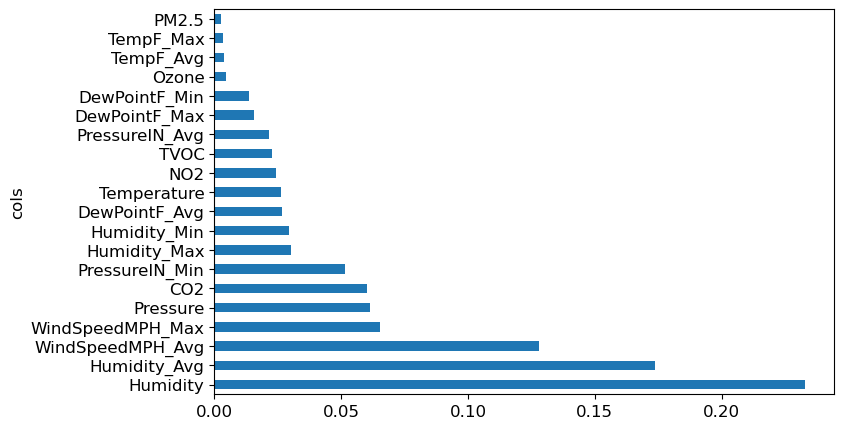

In [22]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

fi = rf_feat_importance(m, xs)
#fi[:10]

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(8,5), legend=False)
plot_fi(fi[:20])



In [23]:
# random forest parameter search
i_range = range(0,5) # number of trials per parameter set
s_range = range(200,2000,200) # max_samples
n_range = range(1,50,2) # n_estimators

import numpy as np
param_arr = np.zeros((2, len(i_range), len(s_range), len(n_range)))
param_arr.shape

(2, 5, 9, 25)

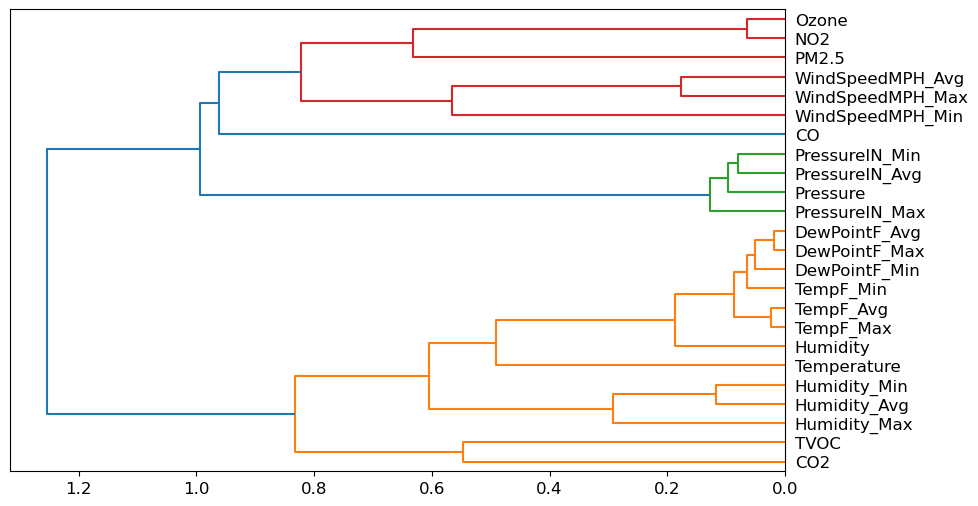

In [24]:
# rank correlation of column values
cluster_columns(xs)

In [25]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

for i in i_range:
    j = 0
    for s in s_range:
        k = 0
        for n in n_range:
            m = rf(xs, y, n_estimators=n, max_samples=s);
            param_arr[0,i,j,k] = m_rmse(m, xs, y)
            param_arr[1,i,j,k] = m_rmse(m, valid_xs, valid_y)
            k += 1
        j += 1

warnings.filterwarnings("default", category=UserWarning)

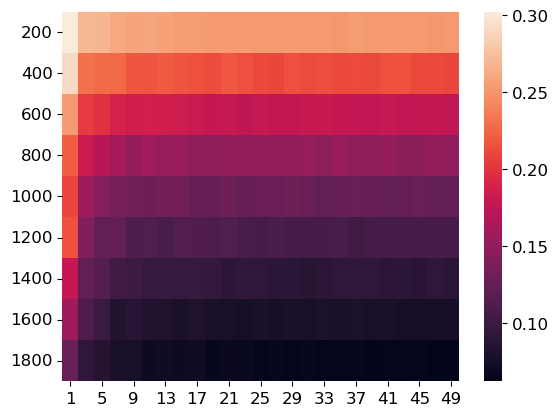

In [26]:
# plot average RMSE for training set
import seaborn as sns
%matplotlib inline

params = pd.DataFrame(param_arr[0].mean(axis=0), index=s_range, columns=n_range)
sns.heatmap(params, annot=False);

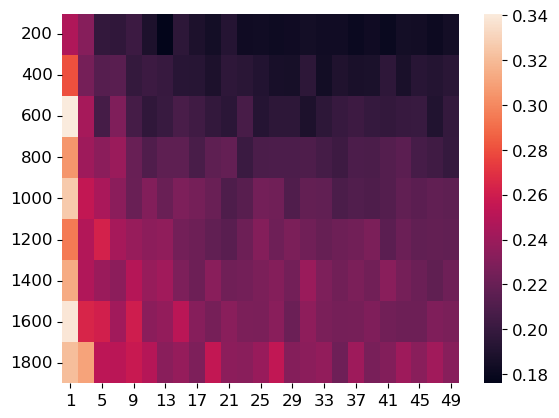

In [27]:
# plot average RMSE for validation set
params = pd.DataFrame(param_arr[1].mean(axis=0), index=s_range, columns=n_range)
sns.heatmap(params, annot=False);

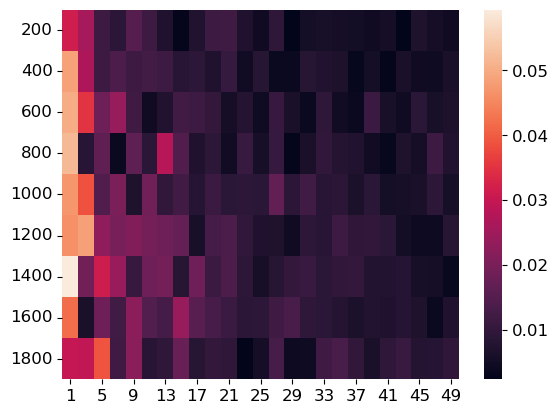

In [28]:
# plot stddev of RMSE for validation set
params = pd.DataFrame(param_arr[1].std(axis=0), index=s_range, columns=n_range)
sns.heatmap(params, annot=False);

In [29]:
to = TabularPandas(mdf, [Categorify, FillMissing, Normalize], cat, cont, y_names=dep_var, splits=splits)
dls = to.dataloaders(bs=32)
dls.show_batch()
learn = tabular_learner(dls, loss_func=F.mse_loss, metrics=[rmse, mae], layers=[100,100])
#learn.lr_find()

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,TempF_Max,TempF_Avg,TempF_Min,DewPointF_Max,DewPointF_Avg,DewPointF_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeedMPH_Max,WindSpeedMPH_Avg,WindSpeedMPH_Min,PressureIN_Max,PressureIN_Avg,PressureIN_Min,PrecipitationIN_Total
0,22.900000,50.700001,1.0,975.000004,2.785980e-10,18.000003,1.500000,7.3,1003.700012,77.000000,69.599998,62.0,65.000000,62.700001,61.000000,96.000000,79.800003,60.000000,10.0,5.700000,1.120981e-08,29.900000,29.799999,29.799999,0.00
1,21.400000,19.600000,1.0,763.000001,2.785980e-10,82.999997,52.400002,8.6,1007.900025,38.000000,28.499999,20.0,14.000002,10.999999,8.000000,65.000001,49.299999,32.000000,13.0,5.400000,1.120981e-08,30.100000,30.000000,29.900000,0.00
2,21.500000,60.799999,1.0,942.999999,2.785980e-10,388.000007,0.600000,7.1,995.000000,71.000000,59.099999,49.0,57.000000,53.099999,44.000000,97.000000,82.199997,50.000000,17.0,8.100000,1.120981e-08,29.700001,29.600000,29.600000,0.13
3,21.900000,39.099999,1.0,941.999997,2.785980e-10,19.999996,16.799999,7.9,988.900024,44.000000,38.500000,36.0,39.000000,36.799999,34.000000,100.000000,93.699997,78.999999,7.0,3.100000,1.120981e-08,29.600000,29.500000,29.400000,0.00
4,22.100000,33.200000,2.0,777.000000,2.785980e-10,1199.999978,23.200001,8.0,991.500000,66.000000,54.200001,46.0,45.000000,35.299999,18.999999,89.000000,53.799999,23.000000,31.0,16.299999,8.000000e+00,29.500000,29.299999,29.200001,0.00
5,22.100000,35.200001,1.0,625.999998,2.785980e-10,1.999993,15.900000,7.6,980.200012,46.000001,38.099998,30.0,39.000000,29.399999,21.000001,96.000000,73.000000,47.000000,14.0,7.000000,1.120981e-08,29.299999,29.299999,29.200001,0.11
6,22.000000,31.500000,1.0,872.000000,2.785980e-10,157.999998,21.399999,7.7,994.500000,49.000000,46.299999,44.0,44.000000,36.500000,28.000000,97.000000,71.099998,48.000000,10.0,5.300000,1.120981e-08,29.799999,29.700001,29.500000,0.00
7,21.600000,51.799999,1.0,681.000004,2.785980e-10,26.999996,4.000000,7.5,1011.500000,49.999999,43.900001,33.0,39.000000,34.599998,30.000000,92.000000,71.199997,50.000000,10.0,5.000000,1.120981e-08,30.200001,30.100000,30.000000,0.00
8,21.299999,25.799999,1.0,797.999999,2.785980e-10,112.999999,37.500000,8.3,1006.900024,36.000001,30.200000,23.0,22.999999,13.800000,9.999999,66.000000,51.400002,36.000000,15.0,6.000000,1.120981e-08,30.000000,29.900000,29.799999,0.00
9,22.000000,54.500000,2.0,929.999996,2.785980e-10,321.000003,1.200000,7.4,988.200013,84.000000,76.199998,70.0,69.000000,59.500000,54.000000,91.000000,58.500000,37.000000,15.0,7.100000,1.120981e-08,29.600000,29.500000,29.400000,0.00


epoch,train_loss,valid_loss,_rmse,mae,time
0,0.070480,0.080694,0.284067,0.205239,00:04
1,0.051366,0.053727,0.231790,0.161396,00:04
2,0.040114,0.050329,0.224342,0.148813,00:04
3,0.028497,0.064861,0.254678,0.147648,00:04
4,0.023045,0.059995,0.244938,0.143010,00:04
5,0.019424,0.060106,0.245166,0.147858,00:04
6,0.018307,0.064142,0.253263,0.152495,00:04
7,0.014810,0.053323,0.230917,0.146592,00:04
8,0.014344,0.062900,0.250799,0.150588,00:04
9,0.012419,0.057455,0.239698,0.142576,00:04


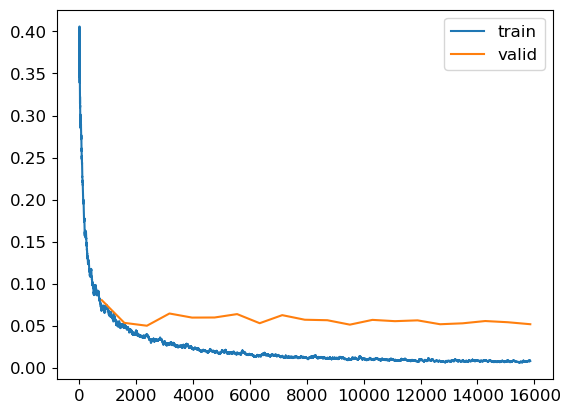

In [30]:
learn.fit_one_cycle(20, 0.001)
learn.recorder.plot_loss()

In [31]:
preds,targs = learn.get_preds()
print("Valid RMSE: %2.2f" % r_mse(preds,targs))

Valid RMSE: 0.23


In [32]:
learn.show_results(max_n=20)

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,TempF_Max,TempF_Avg,TempF_Min,DewPointF_Max,DewPointF_Avg,DewPointF_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeedMPH_Max,WindSpeedMPH_Avg,WindSpeedMPH_Min,PressureIN_Max,PressureIN_Avg,PressureIN_Min,PrecipitationIN_Total,PrecipitationIN_Total_pred
0,-0.127961,-1.403263,-0.403359,0.242071,-0.09432,-0.696420,1.158594,0.733432,1.136646,-0.793669,-0.985361,-0.686178,-0.403696,-0.366640,-0.251296,0.823664,1.535706,1.530101,-1.144948,-1.100694,-0.393344,1.047990,0.425793,0.166009,0.28,0.038657
1,0.319437,-1.095041,-0.403359,0.070620,-0.09432,-0.675015,0.668304,0.352441,-2.119623,-1.459386,-1.331235,-1.302397,-0.699966,-0.755038,-1.437949,1.086905,1.211470,0.400695,2.406503,0.097652,-0.393344,-0.031099,-1.456522,-0.148887,0.68,0.028409
2,2.109019,-1.312610,-0.403359,-2.406556,-0.09432,-0.375350,0.397547,-0.219046,-1.401101,-0.551590,-0.537004,-0.747800,-0.877728,-0.704377,-0.628868,-0.492539,-0.867866,-0.396533,1.696213,1.357453,-0.393344,-1.649723,-0.985941,-0.085907,0.00,0.038600
3,0.766831,0.264762,-0.403359,0.738689,-0.09432,-0.050713,-0.795246,-0.600037,-1.706854,-0.248991,0.007429,0.114906,0.129590,0.286319,0.449908,0.560424,0.774457,0.932180,-0.257085,-0.393977,-0.393344,-1.110179,-1.456522,-0.148887,0.01,0.211853
4,-0.426224,-2.364191,-0.403359,-1.821257,-0.09432,-0.753499,3.507592,2.257396,1.136646,-2.246142,-1.926909,-1.487262,-1.944300,-1.931489,-1.707643,-1.896488,-1.156858,-0.330097,2.584075,2.770888,3.164371,1.587535,1.366955,0.228989,0.00,-0.076288
5,0.468566,-0.496728,-0.403359,0.188862,-0.09432,-0.778471,0.017024,-0.028550,0.204103,-1.217307,-0.786803,-0.254825,-0.344442,-0.107708,0.180214,1.086905,1.881087,2.659507,-0.789803,-0.670519,-0.393344,0.508446,0.425793,-0.022928,0.11,0.107033
6,1.512491,0.418873,-0.403359,-1.454706,-0.09432,-0.582261,-0.948919,-1.171524,-2.884006,0.719324,0.551861,0.731125,0.544368,0.595912,0.234153,0.823664,0.457270,-1.127325,-0.079513,0.681463,2.147881,-2.189268,-2.397675,-0.274845,0.27,0.106670
7,2.556417,-1.774943,0.459886,-1.300991,-0.09432,-0.518048,-0.253733,-1.933506,0.937909,-0.127952,-0.633081,-1.240775,-1.055490,-1.008340,-0.898561,-0.229298,-1.121615,-1.592375,-0.967375,-1.039241,-0.393344,1.587535,1.366955,0.228989,0.00,-0.048781
8,1.512491,-1.475786,-0.403359,-0.561976,-0.09432,-0.093522,0.961014,0.352441,2.405520,-0.612110,-1.004576,-1.240775,-1.470268,-1.571236,-1.437949,-1.808742,-1.875815,-1.592375,-0.789803,-0.731972,-0.393344,2.666615,2.308117,0.354948,0.00,-0.117574
9,-0.724489,-1.448590,-0.403359,-0.644746,-0.09432,-0.774903,1.575706,1.304919,-1.477539,-2.064583,-1.779592,-1.364018,-1.292506,-1.064630,-0.952500,0.384930,1.444074,2.526636,0.453205,2.125624,4.180861,-1.649723,-1.456522,-0.148887,0.27,0.428876


In [33]:
learn.get_preds()[0]

#df['PrecipitationIN_Total_pred' < 0] = 0

tensor([[0.4437],
        [0.4254],
        [0.4435],
        [0.4257],
        [0.4263],
        [0.4425],
        [0.4367],
        ...,
        [0.1056],
        [0.1063],
        [0.1111],
        [0.1080],
        [0.0995],
        [0.0982],
        [0.1049]])